# 1b

(540, 7500) (540,)


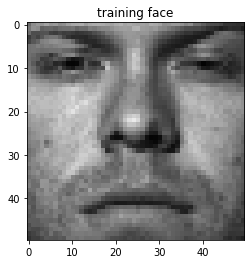

In [1]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
import cv2
%matplotlib inline

train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = cv2.imread(line.strip().split()[0])
    train_data.append(im.flatten())
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print (train_data.shape, train_labels.shape)
plt.imshow((train_data[10, :]).astype(np.uint8).reshape(50,50,3))
plt.title('training face')
plt.show()

(100, 7500) (100,)


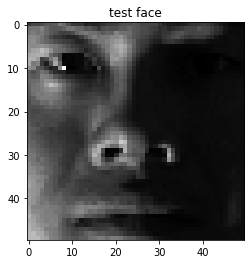

In [2]:
%matplotlib inline

test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = cv2.imread(line.strip().split()[0])
    test_data.append(im.flatten())
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)
print (test_data.shape, test_labels.shape)
plt.imshow((test_data[10, :]).astype(np.uint8).reshape(50,50,3))
plt.title('test face')
plt.show()

# 1c

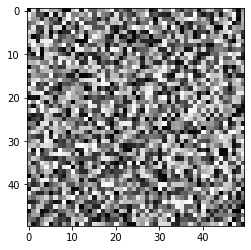

In [3]:
mu = np.mean(train_data,axis=0)
plt.imshow((mu*255).astype(np.uint8).reshape(50,50,3))
plt.show()

# 1d

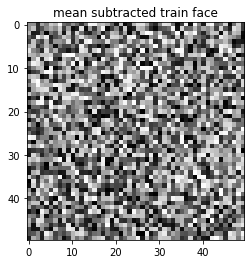

In [4]:
train_data = train_data - mu
plt.imshow((train_data[10, :]*255).astype(np.uint8).reshape(50,50,3))
plt.title('mean subtracted train face')
plt.show()

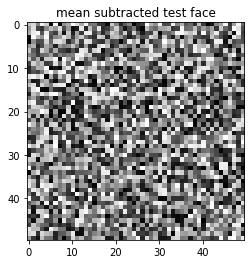

In [5]:
test_data = test_data - mu
plt.imshow((test_data[10, :]*255).astype(np.uint8).reshape(50,50,3))
plt.title('mean subtracted test face')
plt.show()

# 1e

In [6]:
u,s,vt = np.linalg.svd(train_data, full_matrices=False)
# need a diagonal matrix not vector
s = np.diag(s)

In [7]:
print(u.shape)
print(s.shape)
print(vt.shape)

(540, 540)
(540, 540)
(540, 7500)


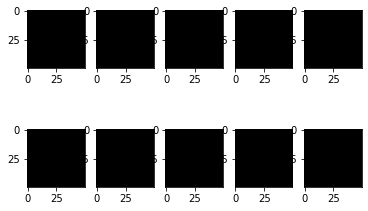

In [8]:
plt.figure()
for i in range(10):
    plt.subplot(2,5,i+1)
    display(plt.imshow((vt[i,:]).astype(np.uint8).reshape(50,50,3)))

# 1f

In [9]:
def rank_r(r,u,s,vt):
    return (u[:,:r]).dot((s[:r,:r]).dot(vt[:r,:]))

In [10]:
error = []
for r in range(1,201):
    error.append(np.linalg.norm(train_data - rank_r(r,u,s,vt)))
r = list(range(1,201))

<function matplotlib.pyplot.show(*args, **kw)>

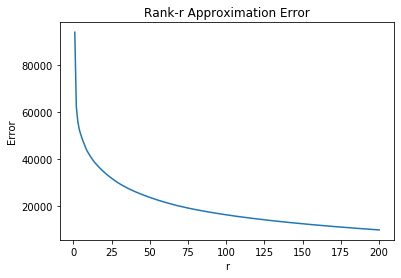

In [11]:
plt.plot(r,error)
plt.title('Rank-r Approximation Error')
plt.xlabel('r')
plt.ylabel('Error')
plt.show

# 1g

In [12]:
"""Return r-dimensional feature transformation of training data"""
def train_dim(r):
    return train_data.dot(vt[:r,:].T)

In [13]:
"""Return r-dimensional feature transformation of test data"""
def test_dim(r):
    return test_data.dot(vt[:r,:].T)

# 1h

In [14]:
tr = train_dim(10) 
ts = test_dim(10)

In [15]:
from sklearn.linear_model import LogisticRegression as LR

In [16]:
faces = LR(multi_class='ovr',solver='liblinear').fit(tr,train_labels)

In [17]:
faces.score(ts, test_labels)

0.79

In [18]:
acc = []
for r in range(1,201):
    tr = train_dim(r)
    ts = test_dim(r)
    model = LR(multi_class='ovr',solver='liblinear').fit(tr,train_labels)
    acc.append(model.score(ts,test_labels))
r = list(range(1,201))

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

<function matplotlib.pyplot.show(*args, **kw)>

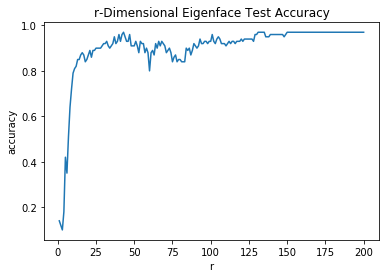

In [24]:
plt.plot(r,acc)
plt.title('r-Dimensional Eigenface Test Accuracy')
plt.xlabel('r')
plt.ylabel('accuracy')
plt.show